# 📊 Social Media Engagement Prediction

## 🎯 Objective

The goal of this project is to analyze and model social media engagement based on post metadata. Specifically, the project explores how factors such as platform, post type, posting time, and day of the week influence user engagement — measured in **likes**, **comments**, and **shares**.

The primary objectives are:

- To perform exploratory data analysis (EDA) and uncover trends in post engagement.
- To engineer relevant features (e.g., posting hour, weekday, etc.) from date and time metadata.
- To build and evaluate a **multi-output regression model** that predicts:
  - Number of likes
  - Number of comments
- To identify which features drive engagement and where the model performs well or poorly.
- To discuss limitations and potential improvements, such as incorporating post content or user data.

## 📦 Dataset Overview

The dataset includes 100 social media posts from various platforms (Facebook, Instagram, Twitter), each with the following fields:
- Platform
- Post type (image, text, poll, video, etc.)
- Engagement metrics (likes, comments, shares)
- Posting date and time
- Sentiment classification (positive, neutral, negative)

## 🛠️ Tools & Techniques

- **Pandas** for data wrangling and feature engineering
- **Seaborn / Matplotlib** for visualizations
- **Scikit-learn** for modeling and evaluation
- **MultiOutputRegressor** with Random Forest as the base model

---


In [135]:
# 1. Project Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
# 2. Load the data
data=pd.read_csv('social_media_engagement1.csv')

In [137]:
# Create a copy

df=data.copy()

In [138]:
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [140]:
df.describe()

,post_id,likes,comments,shares
count,100.000000,100.000000,100.00000,100.000000
mean,50.500000,2381.810000,202.66000,415.650000
std,29.011492,1632.573284,138.84067,283.877601
min,1.000000,15.000000,10.00000,16.000000
25%,25.750000,895.750000,89.75000,183.000000
50%,50.500000,2220.000000,171.00000,356.500000
75%,75.250000,3593.250000,299.00000,689.500000
max,100.000000,5000.000000,500.00000,993.000000


In [141]:
# 3. Initial Checks

In [142]:
df.isnull().sum()

post_id            0
platform           0
post_type          0
post_time          0
likes              0
comments           0
shares             0
post_day           0
sentiment_score    0
dtype: int64

In [143]:
df.duplicated().sum()

np.int64(0)

In [144]:
df.nunique()

post_id            100
platform             3
post_type            5
post_time           99
likes               93
comments            85
shares              96
post_day             7
sentiment_score      3
dtype: int64

In [145]:
# 4. Data Cleaning

In [146]:
# Seperate the date and time into two columns

df['post_time'] = pd.to_datetime(df['post_time'])

df['date']=df['post_time'].dt.date
df['time']=df['post_time'].dt.time
df

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,date,time
0,1,Facebook,image,2023-08-17 14:45:00,2121,474,628,Thursday,positive,2023-08-17,14:45:00
1,2,Facebook,carousel,2023-05-14 00:45:00,3660,432,694,Sunday,neutral,2023-05-14,00:45:00
2,3,Instagram,poll,2023-02-21 16:15:00,4955,408,688,Tuesday,negative,2023-02-21,16:15:00
3,4,Twitter,image,2023-11-16 00:45:00,1183,90,187,Thursday,negative,2023-11-16,00:45:00
4,5,Twitter,video,2023-05-23 00:30:00,3499,247,286,Tuesday,positive,2023-05-23,00:30:00
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,2023-07-12 17:45:00,36,294,911,Wednesday,positive,2023-07-12,17:45:00
96,97,Twitter,video,2023-10-27 23:45:00,314,108,458,Friday,neutral,2023-10-27,23:45:00
97,98,Twitter,text,2023-08-05 08:45:00,229,179,38,Saturday,positive,2023-08-05,08:45:00
98,99,Instagram,poll,2023-12-29 12:15:00,5000,500,204,Friday,positive,2023-12-29,12:15:00


In [147]:
df = df.drop('post_time', axis=1)
df

,post_id,platform,post_type,likes,comments,shares,post_day,sentiment_score,date,time
0,1,Facebook,image,2121,474,628,Thursday,positive,2023-08-17,14:45:00
1,2,Facebook,carousel,3660,432,694,Sunday,neutral,2023-05-14,00:45:00
2,3,Instagram,poll,4955,408,688,Tuesday,negative,2023-02-21,16:15:00
3,4,Twitter,image,1183,90,187,Thursday,negative,2023-11-16,00:45:00
4,5,Twitter,video,3499,247,286,Tuesday,positive,2023-05-23,00:30:00
...,...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,36,294,911,Wednesday,positive,2023-07-12,17:45:00
96,97,Twitter,video,314,108,458,Friday,neutral,2023-10-27,23:45:00
97,98,Twitter,text,229,179,38,Saturday,positive,2023-08-05,08:45:00
98,99,Instagram,poll,5000,500,204,Friday,positive,2023-12-29,12:15:00


In [148]:
# 5. Exploratory Data Analysis

In [149]:
sns.set(style='whitegrid', palette='coolwarm')

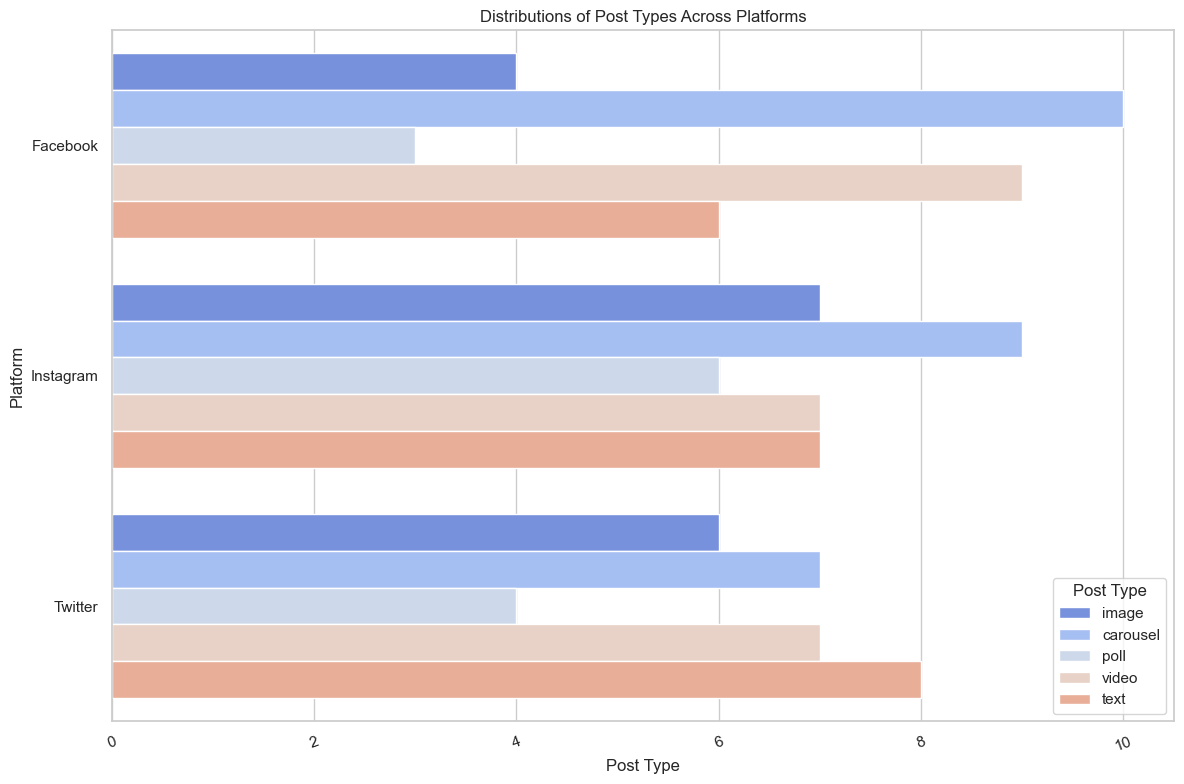

In [150]:
# Countplot for post type by platform

plt.figure(figsize=(12,8))
sns.countplot(data=df, y='platform',hue='post_type')
plt.title('Distributions of Post Types Across Platforms')
plt.ylabel('Platform')
plt.xlabel('Post Type')
plt.xticks(rotation=20)
plt.legend(title='Post Type')
plt.tight_layout()



Facebook users tend to upload carousels and videos, while polls are used much less frequently. Instagram users appear to utilize all post types, with carousels being the most common. On Twitter, users primarily post text-based content, likely for sharing thoughts and ideas.

Overall, carousels are a popular format across all three platforms. This could suggest that users find it more efficient to share multiple images or videos in a single post. By uploading more media at once, they may be able to convey a clearer message or evoke a stronger emotional response.

Polls are especially popular on Instagram but are used less frequently on Facebook and Twitter. This may be because Instagram users tend to be more actively engaged, and the platform delivers quicker feedback and interaction on polls.

Text(0.5, 1.0, 'Distribution by Sentiment Score')

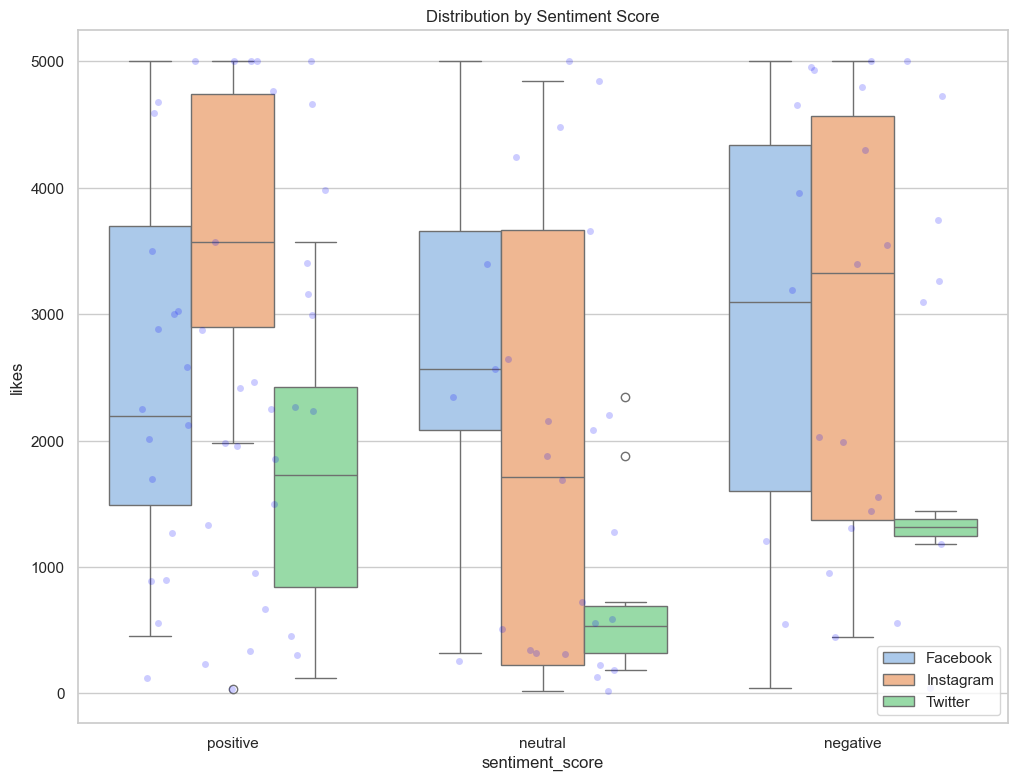

In [151]:
# Boxplot : Engagement by sentiment

plt.figure(figsize=(12,9))
sns.boxplot(data=df, x='sentiment_score', y='likes',hue='platform', palette='pastel')
sns.stripplot(data=df, x='sentiment_score', y='likes',color= 'blue', alpha=0.2, jitter=0.3)
plt.title('Distribution by Sentiment Score')

Positive: Instagram posts tend to receive the most likes, followed by Facebook, with Twitter lagging behind. Facebook shows a larger overall range of likes, while Instagram has a wider interquartile range (IQR) — indicating more variability among typical post performance.

Neutral: Both Instagram and Facebook receive more likes than Twitter, but Instagram again shows a wider IQR. Twitter has a much smaller range overall, suggesting users engage less with neutral posts on the platform.

Negative: Instagram has the widest IQR, with Facebook close behind. Twitter displays a very narrow range, indicating that even negative posts receive minimal interaction.

Overall: Instagram consistently drives higher engagement in terms of likes, regardless of the post’s sentiment. This suggests that its audience is more responsive across all content types.

Text(0.5, 1.0, 'Correlation Matrix of Engagement Metrics')

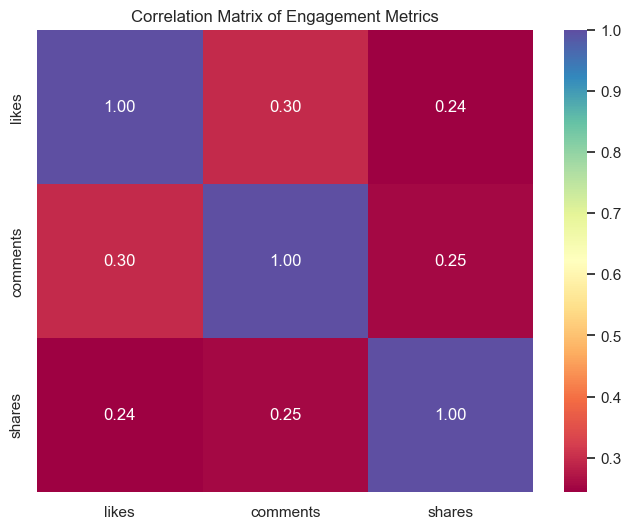

In [152]:
# Correlation Matrix

plt.figure(figsize=(8,6))
num_cols=['likes','comments','shares']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Spectral', fmt='.2f')
plt.title("Correlation Matrix of Engagement Metrics")


The correlation matrix shows that likes, comments, and shares have low positive correlations with each other. The strongest relationship is between likes and comments (0.30), but it still falls into the weak correlation range. This suggests that these engagement metrics may be influenced by different factors — for example, a post that gets a lot of likes doesn’t necessarily receive many comments or shares.

Overall, no strong linear relationships are present between the three metrics, indicating that each may represent a distinct type of user engagement.

In [153]:
# Create time based plot, based on the hour

# extract hour
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['hour']=df['time'].dt.hour

# Calculate total engagement and group hourly
df['engage_tot']=df['likes']+df['comments']+df['shares']
hourly=df.groupby('hour')['engage_tot'].sum().reset_index()

# Sort by hour
hourly=hourly.sort_values(by='hour')

C:\Users\vanre\AppData\Local\Temp\ipykernel_6796\1165851906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly, x='hour', y='engage_tot', palette='viridis')


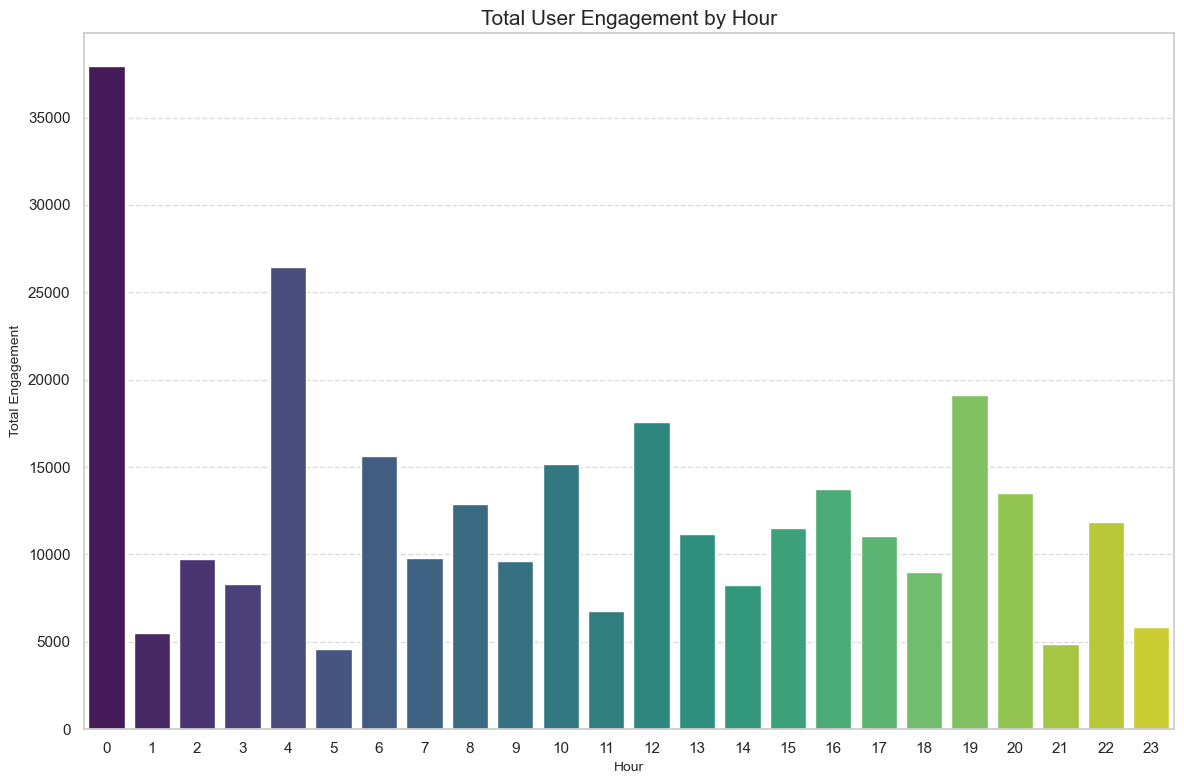

In [154]:
# Plot:

plt.figure(figsize=(12,8))
sns.barplot(data=hourly, x='hour', y='engage_tot', palette='viridis')

plt.title('Total User Engagement by Hour', fontsize=15)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Total Engagement', fontsize=10)
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Hourly User Engagement Trend Analysis

The chart above visualizes total user engagement (likes, comments, and shares) grouped by the hour of the day. The data reveals a significant spike in activity at **midnight (00:00)**, suggesting high levels of late-night user engagement. This could be due to users browsing social media at the end of the day, possibly as part of their nighttime routine.

Another notable increase occurs around **4:00 AM**, which may correspond to early risers starting their day or night-shift workers engaging with content during breaks. Additionally, there is a smaller yet noticeable rise in engagement during the **early evening hours (around 19:00)**, likely when users are off work and more active online.

These patterns highlight the importance of **timing social media posts** to match peak user engagement windows. However, it’s important to note that this analysis is based on a sample of 100 posts, and broader trends may vary with larger datasets or different platforms.


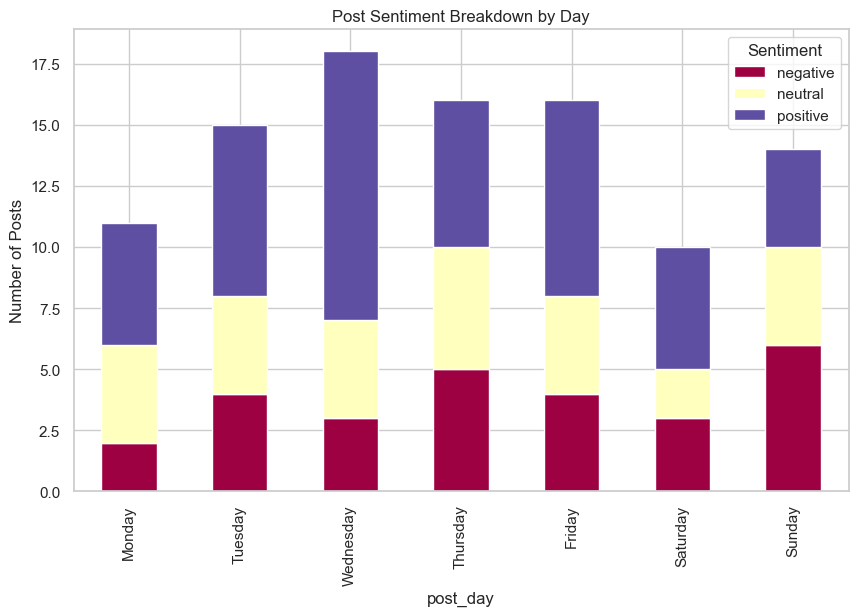

In [155]:
# Stacked bar: Sentiment Distribution by Day

sentiment_day = pd.crosstab(df['post_day'], df['sentiment_score']).reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

sentiment_day.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(10, 6))
plt.title("Post Sentiment Breakdown by Day")
plt.ylabel("Number of Posts")
plt.legend(title='Sentiment')


### Post Sentiment by Day of the Week

The chart above shows the distribution of post sentiments (positive, neutral, and negative) across each day of the week. Overall, **Wednesday records the highest number of posts**, followed by **Thursday** and **Friday**, with the **lowest activity on Saturday**.

Across all days, **positive sentiment is the most common**, especially midweek. **Neutral sentiment** remains relatively stable, while **negative posts** are notably higher on **Sunday** and **Thursday**.

This suggests that user engagement or content tone may be more favorable during weekdays, particularly from Tuesday to Friday, while Sundays show a shift toward more critical or negative posts. These trends can help guide **content scheduling** and **tone management** throughout the week.


In [156]:
df.head()

,post_id,platform,post_type,likes,comments,shares,post_day,sentiment_score,date,time,hour,engage_tot
0,1,Facebook,image,2121,474,628,Thursday,positive,2023-08-17,1900-01-01 14:45:00,14,3223
1,2,Facebook,carousel,3660,432,694,Sunday,neutral,2023-05-14,1900-01-01 00:45:00,0,4786
2,3,Instagram,poll,4955,408,688,Tuesday,negative,2023-02-21,1900-01-01 16:15:00,16,6051
3,4,Twitter,image,1183,90,187,Thursday,negative,2023-11-16,1900-01-01 00:45:00,0,1460
4,5,Twitter,video,3499,247,286,Tuesday,positive,2023-05-23,1900-01-01 00:30:00,0,4032


In [157]:
# Feature Engineering

# Extract day,month,year from date
df['day'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year


In [158]:
# Drop columns that are not useful or will cause issues
df_model = df.drop(columns=[
    'post_id',         
    'date',            
    'time',            
    'post_day',       
    'sentiment_score'  
])


In [159]:
df_model = pd.get_dummies(df_model, drop_first=True)

In [160]:
df_model

,likes,comments,shares,hour,engage_tot,day,month,year,platform_Instagram,platform_Twitter,post_type_image,post_type_poll,post_type_text,post_type_video
0,2121,474,628,14,3223,17,8,2023,False,False,True,False,False,False
1,3660,432,694,0,4786,14,5,2023,False,False,False,False,False,False
2,4955,408,688,16,6051,21,2,2023,True,False,False,True,False,False
3,1183,90,187,0,1460,16,11,2023,False,True,True,False,False,False
4,3499,247,286,0,4032,23,5,2023,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,294,911,17,1241,12,7,2023,True,False,False,False,False,False
96,314,108,458,23,880,27,10,2023,False,True,False,False,False,True
97,229,179,38,8,446,5,8,2023,False,True,False,False,True,False
98,5000,500,204,12,5704,29,12,2023,True,False,False,True,False,False


In [161]:
# Predicting likes and comments

# Define target variables
y = df_model[['likes', 'comments']]

# Define feature set by dropping the targets
X = df_model.drop(columns=['likes', 'comments'])



In [162]:
# 7. Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



In [163]:
# 8. Modeling

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Initialize model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Fit model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)



In [100]:
# Predict on test set

y_pred = model.predict(X_test)


In [164]:
# 9. Evaluate

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Separate the predictions
y_pred_likes = y_pred[:, 0]
y_pred_comments = y_pred[:, 1]

y_test_likes = y_test.iloc[:, 0]
y_test_comments = y_test.iloc[:, 1]

# Evaluation for Likes
print("Likes Prediction:")
print("  MAE:", mean_absolute_error(y_test_likes, y_pred_likes))
print("  RMSE:", np.sqrt(mean_squared_error(y_test_likes, y_pred_likes)))
print("  R^2 Score:", r2_score(y_test_likes, y_pred_likes))

# Evaluation for Comments
print("\nComments Prediction:")
print("  MAE:", mean_absolute_error(y_test_comments, y_pred_comments))
print("  RMSE:", np.sqrt(mean_squared_error(y_test_comments, y_pred_comments)))
print("  R^2 Score:", r2_score(y_test_comments, y_pred_comments))



Likes Prediction:
  MAE: 172.31749999999994
  RMSE: 239.38549134189398
  R^2 Score: 0.9730799510688599

Comments Prediction:
  MAE: 109.47449999999999
  RMSE: 126.63513080895048
  R^2 Score: 0.26056097253107846


## Likes prediction

The model is very accurate at predicting likes.

MAE and RMSE are relatively small compared to the scale (many posts had thousands of likes).

R² close to 1 means it's capturing the patterns in the data very well.

## Comments prediction

The model struggles to predict comments accurately.

R² of 0.26 means most of the variability in comment counts is not explained by your current features.

The error values are large relative to the typical number of comments, especially for smaller posts.

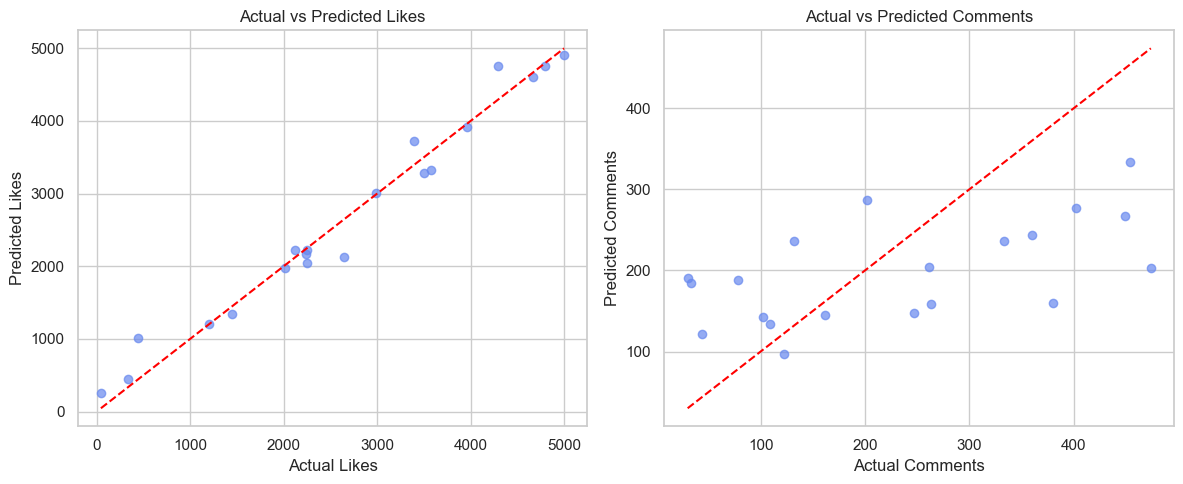

In [165]:
# Visualize predictions

plt.figure(figsize=(12, 5))

# Likes
plt.subplot(1, 2, 1)
plt.scatter(y_test_likes, y_pred_likes, alpha=0.7)
plt.plot([y_test_likes.min(), y_test_likes.max()], [y_test_likes.min(), y_test_likes.max()], 'r--')
plt.title('Actual vs Predicted Likes')
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')

# Comments
plt.subplot(1, 2, 2)
plt.scatter(y_test_comments, y_pred_comments, alpha=0.7)
plt.plot([y_test_comments.min(), y_test_comments.max()], [y_test_comments.min(), y_test_comments.max()], 'r--')
plt.title('Actual vs Predicted Comments')
plt.xlabel('Actual Comments')
plt.ylabel('Predicted Comments')

plt.tight_layout()
plt.show()


#### "In this project, I built a multi-output regression model to predict social media engagement (likes and comments) based on post metadata. The model performed exceptionally well on likes (R² = 0.97) but struggled with comments (R² = 0.26), likely due to missing contextual features such as text content or user behavior. This experience helped me sharpen my understanding of real-world model limitations and feature engineering."